## Шпак Игорь ИУ5-25М РК1

### Вариант №15

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine

### Задача 15

In [3]:
data = pd.read_csv('laptops_train.csv', sep=",")

In [4]:
data.Weight.unique()
data["Weight_num"] = data.apply(lambda x: float(x.Weight.strip("kg")),axis=1)

In [5]:
data.head()

Manufacturer   Model Name   Category Screen Size  \
0        Apple  MacBook Pro  Ultrabook       13.3"   
1        Apple  Macbook Air  Ultrabook       13.3"   
2           HP       250 G6   Notebook       15.6"   
3        Apple  MacBook Pro  Ultrabook       15.4"   
4        Apple  MacBook Pro  Ultrabook       13.3"   

                               Screen                         CPU   RAM  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

               Storage                           GPU Operating System  \
0            128GB SSD  Intel Iris Plus Graphics 640            macOS   
1  128GB Flash Storage        Intel HD Graphics 6000            macOS   
2            256GB SSD         Intel HD Graphics 620            No OS   
3            512GB SSD            AMD Radeon Pro 455            macOS   
4            256GB SSD  Intel Iris Plus Graphics 650            macOS   

  Operating System Version  Weight        Price  Weight_num  
0                      NaN  1.37kg  11912523.48        1.37  
1                      NaN  1.34kg   7993374.48        1.34  
2                      NaN  1.86kg   5112900.00        1.86  
3                      NaN  1.83kg  22563005.40        1.83  
4                      NaN  1.37kg  16037611.20        1.37

In [6]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

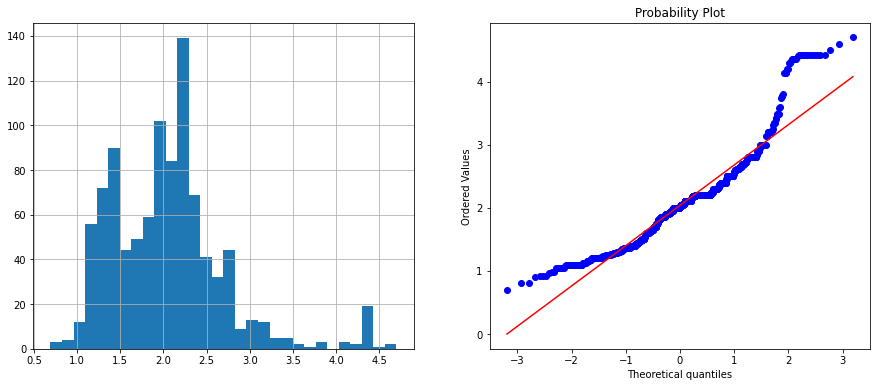

In [7]:
diagnostic_plots(data,"Weight_num")

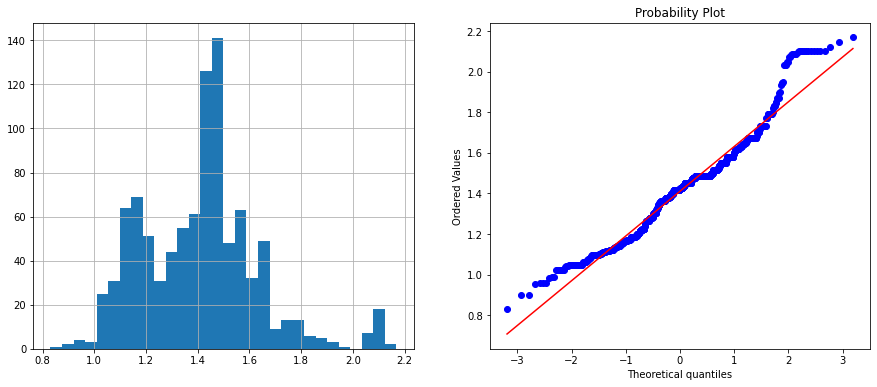

In [8]:
data['Weight_num_exp1'] = data['Weight_num']**(1/2)
diagnostic_plots(data, 'Weight_num_exp1')

### Задача 35

In [9]:
wine = load_wine()
dataX = wine.data
dataY = wine.target

In [10]:
d1 = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])
d2 = pd.DataFrame(data=wine['target'], columns=['class']).apply(lambda x: wine['target_names'][x])
df = pd.concat([d1,d2],axis=1)

In [11]:
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline    class  
0                          3.92   1065.0  class_0  
1                          3.40   1050.0  class_0  
2                          3.17   1185.0  class_0  
3                          3.45   1480.0  class_0  
4                          2.93    735.0  class_0

In [12]:
dtc1 = DecisionTreeClassifier()
dtc1.fit(dataX, dataY)

# Важность признаков
dtc1.feature_importances_, sum(dtc1.feature_importances_)

(array([0.02679372, 0.02048135, 0.        , 0.        , 0.03297845,
        0.        , 0.14144668, 0.        , 0.        , 0.        ,
        0.08378678, 0.31204257, 0.38247045]),
 1.0)

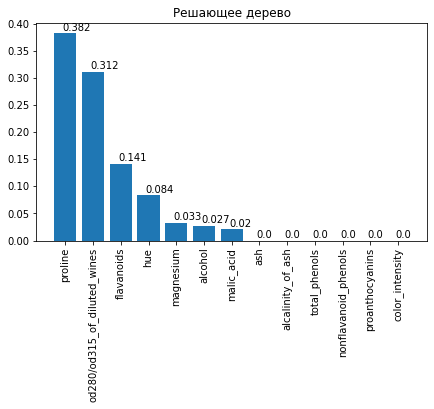

In [13]:

from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, title, figsize=(7,4)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.1, b+0.005, str(round(b,3)))
    plt.show()
    return labels, data

_,_=draw_feature_importances(dtc1, d1, 'Решающее дерево')



### Дополнительное задание

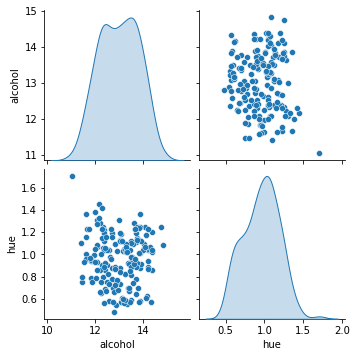

In [19]:
sns.pairplot(data=d1,vars=['alcohol','hue'],diag_kind="kde")